In [1]:
!conda install numpy pytorch torchvision cpuonly -c pytorch -y

Solving environment: done

# All requested packages already installed.



In [2]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [3]:
dataset = MNIST(root='data/', download=True)

In [4]:
test_dataset = MNIST(root='data/', train=False)

In [5]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [6]:
len(dataset)

60000

In [7]:
len(test_dataset)

10000

In [8]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test

In [9]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F36FC744590>, 5)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def disp_img_lbl(datapoint):
    image, label = datapoint
    print("Label: ", label)
    print("Image: ")
    plt.imshow(image, cmap='gray')

Label:  5
Image: 


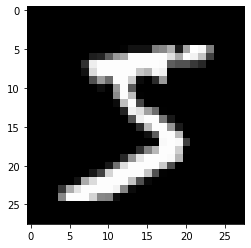

In [12]:
disp_img_lbl(dataset[0])

Label:  2
Image: 


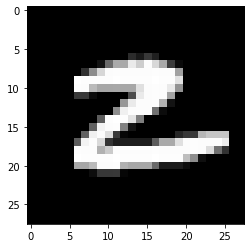

In [13]:
disp_img_lbl(dataset[189])

# Transform PIL image to tensor data

In [14]:
import torchvision.transforms as transforms

In [15]:
dataset = MNIST(root='data/', train=True, 
               transform=transforms.ToTensor())

In [16]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [17]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


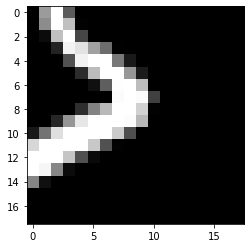

In [18]:
img_tensor_short = img_tensor[0 , 10: , 10: ]
plt.imshow(img_tensor_short, cmap='gray')

# Preparing Training and Validation Datasets

In [19]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])

len(train_ds), len(val_ds)

(50000, 10000)

# Creating batches of data using Dataloader

In [20]:
from torch.utils.data import DataLoader

batch_size = 128

train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size)

# Model

In [21]:
import torch.nn as nn

In [22]:
input_size = 28*28
num_classes = 10
linear_model = nn.Linear(input_size, num_classes)

In [23]:
print(linear_model.weight.shape)
linear_model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0110,  0.0107,  0.0116,  ...,  0.0251, -0.0108, -0.0234],
        [-0.0013, -0.0108, -0.0082,  ..., -0.0004,  0.0297, -0.0114],
        [ 0.0151, -0.0321, -0.0127,  ..., -0.0233, -0.0054,  0.0076],
        ...,
        [-0.0122, -0.0217, -0.0041,  ..., -0.0217, -0.0105,  0.0239],
        [ 0.0356, -0.0039, -0.0356,  ...,  0.0222,  0.0185, -0.0134],
        [ 0.0033, -0.0302, -0.0068,  ..., -0.0122,  0.0077,  0.0118]],
       requires_grad=True)

In [24]:
print(linear_model.bias.shape)
linear_model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0209, -0.0156, -0.0129,  0.0037, -0.0176,  0.0138, -0.0190,  0.0122,
        -0.0339,  0.0218], requires_grad=True)

In [25]:
for image, labels in train_dl:
    print(image.shape)
    print(labels)
    break

torch.Size([128, 1, 28, 28])
tensor([6, 7, 6, 0, 5, 9, 6, 2, 9, 0, 1, 9, 9, 8, 4, 5, 0, 9, 2, 9, 0, 0, 8, 5,
        6, 4, 4, 4, 6, 9, 3, 5, 3, 1, 5, 2, 0, 1, 5, 0, 6, 5, 1, 7, 0, 1, 0, 0,
        0, 0, 7, 9, 3, 3, 8, 0, 9, 8, 1, 3, 0, 3, 5, 8, 3, 5, 7, 3, 4, 2, 7, 8,
        6, 1, 0, 9, 9, 5, 8, 3, 0, 2, 6, 2, 7, 9, 7, 5, 3, 7, 7, 6, 1, 6, 2, 6,
        1, 2, 3, 8, 5, 6, 1, 1, 9, 8, 7, 2, 2, 3, 0, 7, 8, 1, 1, 3, 8, 0, 2, 2,
        2, 1, 3, 6, 0, 4, 9, 8])


In [26]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
model = MnistModel()

In [27]:
for images, labels in train_dl:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.1533,  0.1709,  0.2929, -0.1504, -0.3661, -0.0266, -0.2698,  0.1834,
          0.2960, -0.2329],
        [-0.0437, -0.1593,  0.0526,  0.1577, -0.1662,  0.1658, -0.2322, -0.0702,
          0.1916, -0.1225]])


In [28]:
import torch.nn.functional as F

In [29]:
#Apply softmax along dim=1
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0857, 0.1185, 0.1338, 0.0859, 0.0692, 0.0972, 0.0763, 0.1200, 0.1343,
         0.0791],
        [0.0969, 0.0863, 0.1067, 0.1185, 0.0857, 0.1194, 0.0802, 0.0943, 0.1225,
         0.0895]])
Sum:  0.9999999403953552


In [30]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([8, 8, 1, 7, 5, 5, 0, 3, 2, 1, 8, 8, 5, 8, 8, 8, 0, 2, 2, 9, 5, 0, 7, 2,
        2, 8, 7, 1, 7, 0, 8, 8, 2, 7, 5, 4, 8, 1, 0, 3, 9, 8, 8, 5, 0, 8, 0, 1,
        0, 8, 3, 5, 8, 0, 8, 2, 8, 8, 2, 0, 8, 8, 7, 8, 2, 0, 7, 8, 0, 1, 5, 0,
        1, 8, 8, 2, 8, 7, 5, 8, 8, 8, 5, 0, 1, 8, 7, 0, 8, 4, 0, 8, 1, 8, 0, 5,
        2, 1, 0, 8, 8, 0, 5, 4, 5, 1, 8, 8, 7, 8, 7, 5, 5, 2, 1, 1, 8, 5, 8, 4,
        2, 5, 5, 8, 0, 3, 5, 8])
tensor([0.1343, 0.1225, 0.1196, 0.1216, 0.1406, 0.1205, 0.1555, 0.1287, 0.1331,
        0.1260, 0.1358, 0.1289, 0.1197, 0.1287, 0.1420, 0.1325, 0.1181, 0.1266,
        0.1336, 0.1176, 0.1257, 0.1265, 0.1200, 0.1287, 0.1235, 0.1425, 0.1312,
        0.1362, 0.1479, 0.1327, 0.1514, 0.1142, 0.1102, 0.1279, 0.1401, 0.1114,
        0.1481, 0.1447, 0.1172, 0.1219, 0.1089, 0.1217, 0.1301, 0.1268, 0.1307,
        0.1326, 0.1294, 0.1609, 0.1234, 0.1500, 0.1436, 0.1195, 0.1499, 0.1270,
        0.1423, 0.1258, 0.1186, 0.1363, 0.1223, 0.1092, 0.1231, 0.1332, 0.1273,
       

In [31]:
labels

tensor([4, 8, 0, 3, 3, 3, 7, 6, 9, 9, 6, 9, 8, 9, 2, 8, 5, 5, 9, 1, 9, 5, 3, 6,
        4, 6, 2, 3, 5, 5, 0, 9, 1, 8, 4, 5, 0, 9, 9, 2, 1, 2, 4, 2, 2, 4, 2, 0,
        9, 4, 6, 7, 0, 8, 8, 6, 7, 6, 2, 1, 2, 6, 3, 8, 3, 1, 8, 5, 5, 0, 8, 3,
        6, 4, 8, 5, 9, 4, 3, 6, 8, 6, 2, 3, 6, 4, 5, 8, 8, 5, 1, 9, 7, 3, 5, 3,
        1, 0, 7, 2, 6, 7, 3, 1, 3, 9, 8, 9, 3, 6, 0, 9, 8, 5, 0, 0, 6, 3, 9, 5,
        0, 0, 5, 9, 1, 8, 3, 9])

# Evaluation Metric and Loss Function

In [32]:
torch.max(outputs, dim=1)

torch.return_types.max(
values=tensor([0.2960, 0.1916, 0.1222, 0.2413, 0.3069, 0.1864, 0.4811, 0.3155, 0.3684,
        0.2427, 0.3480, 0.2813, 0.1949, 0.2949, 0.3646, 0.3339, 0.1736, 0.2480,
        0.2404, 0.2080, 0.2470, 0.2821, 0.2492, 0.2629, 0.2532, 0.3430, 0.3322,
        0.3258, 0.2757, 0.2780, 0.3007, 0.1365, 0.1217, 0.3098, 0.4378, 0.1092,
        0.4409, 0.3366, 0.1286, 0.1880, 0.1135, 0.2310, 0.2662, 0.2637, 0.2646,
        0.2733, 0.2495, 0.3990, 0.2496, 0.4491, 0.4227, 0.1713, 0.3473, 0.2489,
        0.2969, 0.3058, 0.1906, 0.2937, 0.1812, 0.1226, 0.1931, 0.2898, 0.1700,
        0.2835, 0.1717, 0.3483, 0.2434, 0.1662, 0.0772, 0.2245, 0.2016, 0.1819,
        0.3620, 0.2461, 0.4761, 0.0895, 0.3732, 0.3022, 0.3410, 0.2166, 0.2486,
        0.3996, 0.1258, 0.2915, 0.1999, 0.2559, 0.3250, 0.4129, 0.2202, 0.2601,
        0.2389, 0.3793, 0.1766, 0.2589, 0.4263, 0.2017, 0.2061, 0.3909, 0.2529,
        0.4031, 0.2723, 0.2312, 0.1907, 0.2578, 0.4018, 0.1620, 0.2342, 0.3165,
        0

In [33]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/ len(preds))

In [34]:
accuracy(outputs, labels)

tensor(0.0781)

In [35]:
loss_fn = F.cross_entropy

In [36]:
loss = loss_fn(outputs, labels)
loss

tensor(2.3546, grad_fn=<NllLossBackward>)

In [37]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

# Training the model

```
for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection
```


In [50]:
model = MnistModel()

In [51]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [52]:
result0 = evaluate(model, val_dl)
result0

{'val_loss': 2.3160548210144043, 'val_acc': 0.06971914321184158}

In [53]:
history1 = fit(5, 0.001, model, train_dl, val_dl)

Epoch [0], val_loss: 1.9514, val_acc: 0.6248
Epoch [1], val_loss: 1.6836, val_acc: 0.7291
Epoch [2], val_loss: 1.4841, val_acc: 0.7630
Epoch [3], val_loss: 1.3336, val_acc: 0.7819
Epoch [4], val_loss: 1.2177, val_acc: 0.7953


In [54]:
history2 = fit(5, 0.001, model, train_dl, val_dl)

Epoch [0], val_loss: 1.1266, val_acc: 0.8065
Epoch [1], val_loss: 1.0535, val_acc: 0.8132
Epoch [2], val_loss: 0.9934, val_acc: 0.8188
Epoch [3], val_loss: 0.9434, val_acc: 0.8239
Epoch [4], val_loss: 0.9011, val_acc: 0.8283


In [55]:
history3 = fit(5, 0.001, model, train_dl, val_dl)

Epoch [0], val_loss: 0.8649, val_acc: 0.8335
Epoch [1], val_loss: 0.8334, val_acc: 0.8366
Epoch [2], val_loss: 0.8058, val_acc: 0.8391
Epoch [3], val_loss: 0.7814, val_acc: 0.8405
Epoch [4], val_loss: 0.7596, val_acc: 0.8425


In [56]:
history4 = fit(5, 0.001, model, train_dl, val_dl)

Epoch [0], val_loss: 0.7401, val_acc: 0.8451
Epoch [1], val_loss: 0.7224, val_acc: 0.8459
Epoch [2], val_loss: 0.7064, val_acc: 0.8473
Epoch [3], val_loss: 0.6918, val_acc: 0.8486
Epoch [4], val_loss: 0.6784, val_acc: 0.8496


In [57]:
history1

[{'val_loss': 1.9513593912124634, 'val_acc': 0.6248022317886353},
 {'val_loss': 1.6836273670196533, 'val_acc': 0.7291337251663208},
 {'val_loss': 1.4841259717941284, 'val_acc': 0.7629548907279968},
 {'val_loss': 1.3335553407669067, 'val_acc': 0.7819422483444214},
 {'val_loss': 1.217679738998413, 'val_acc': 0.7952927350997925}]

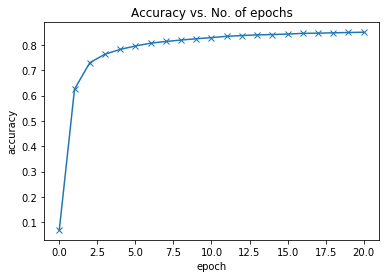

In [58]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

# Testing with individual images

In [59]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


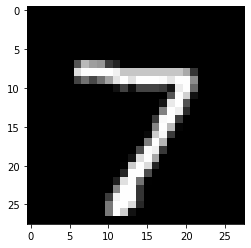

In [60]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [61]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [62]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


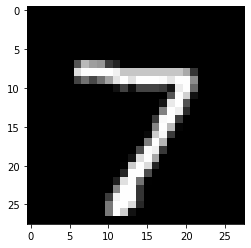

In [63]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 5 , Predicted: 3


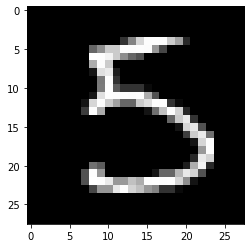

In [64]:
img, label = test_dataset[15]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


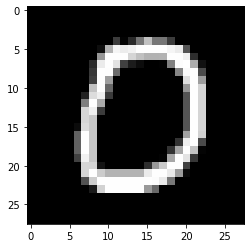

In [65]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 5 , Predicted: 5


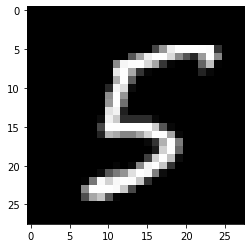

In [66]:
img, label = test_dataset[23]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 4 , Predicted: 4


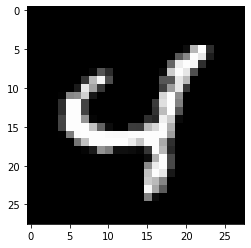

In [67]:
img, label = test_dataset[67]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

# Testing on whole test_dataset

In [68]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6401998996734619, 'val_acc': 0.8619140386581421}

# Saving and Loading model

In [69]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0027,  0.0173,  0.0143,  ..., -0.0231, -0.0097,  0.0223],
                      [-0.0348,  0.0157, -0.0114,  ..., -0.0353,  0.0163, -0.0286],
                      [ 0.0203,  0.0316, -0.0011,  ..., -0.0042,  0.0271,  0.0255],
                      ...,
                      [ 0.0256,  0.0341, -0.0253,  ...,  0.0079,  0.0036, -0.0023],
                      [-0.0071,  0.0318, -0.0263,  ..., -0.0332,  0.0014, -0.0017],
                      [ 0.0021,  0.0087, -0.0103,  ...,  0.0028, -0.0196, -0.0250]])),
             ('linear.bias',
              tensor([-0.0734,  0.0641,  0.0005, -0.0346,  0.0403,  0.0407, -0.0177,  0.0423,
                      -0.1008,  0.0094]))])

In [70]:
torch.save(model.state_dict(), 'mnist_logistic.pth')

In [72]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist_logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0027,  0.0173,  0.0143,  ..., -0.0231, -0.0097,  0.0223],
                      [-0.0348,  0.0157, -0.0114,  ..., -0.0353,  0.0163, -0.0286],
                      [ 0.0203,  0.0316, -0.0011,  ..., -0.0042,  0.0271,  0.0255],
                      ...,
                      [ 0.0256,  0.0341, -0.0253,  ...,  0.0079,  0.0036, -0.0023],
                      [-0.0071,  0.0318, -0.0263,  ..., -0.0332,  0.0014, -0.0017],
                      [ 0.0021,  0.0087, -0.0103,  ...,  0.0028, -0.0196, -0.0250]])),
             ('linear.bias',
              tensor([-0.0734,  0.0641,  0.0005, -0.0346,  0.0403,  0.0407, -0.0177,  0.0423,
                      -0.1008,  0.0094]))])